# Yulu Case Study

In [90]:
import numpy as np,pandas as pd,math as ma,seaborn as sns,matplotlib.pyplot as plt

In [91]:
data=pd.read_csv("bike_sharing.txt")

In [92]:
#viewing the data
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [93]:
#checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [94]:
# checking basic stats
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [95]:
#binnig temp colum
bins=[0,10,20,30,42]
labels=['low','medium','medium_high','high']
data['temp']=pd.cut(data['temp'],bins=bins,labels=labels)


In [96]:
#binnig atemp colum
bins=[0,12,22,32,46]
labels=['low','medium','medium_high','high']
data['atemp']=pd.cut(data['atemp'],bins=bins,labels=labels)

In [97]:
#binnig humidity colum
bins=[0,25,50,75,100]
labels=['low','medium','medium_high','high']
data['humidity']=pd.cut(data['humidity'],bins=bins,labels=labels)

In [98]:
#creating the copy of original data and binning the count colum
n_data=data.copy()
bins=[0,150,300,450,600,750,900,1050]
labels=['Low','L1','Medium','M1','M2','High','H1']
n_data['count']=pd.cut(n_data['count'],bins=bins,labels=labels)

In [99]:
data
n_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,low,medium,high,0.0000,3,13,Low
1,2011-01-01 01:00:00,1,0,0,1,low,medium,high,0.0000,8,32,Low
2,2011-01-01 02:00:00,1,0,0,1,low,medium,high,0.0000,5,27,Low
3,2011-01-01 03:00:00,1,0,0,1,low,medium,medium_high,0.0000,3,10,Low
4,2011-01-01 04:00:00,1,0,0,1,low,medium,medium_high,0.0000,0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,medium,medium,medium,26.0027,7,329,Medium
10882,2012-12-19 20:00:00,4,0,1,1,medium,medium,medium_high,15.0013,10,231,L1
10883,2012-12-19 21:00:00,4,0,1,1,medium,medium,medium_high,15.0013,4,164,L1
10884,2012-12-19 22:00:00,4,0,1,1,medium,medium,medium_high,6.0032,12,117,Low


In [100]:
#checking for null value in columns 
data.isna().sum()

datetime       0
season         0
holiday        0
workingday     0
weather        0
temp           0
atemp          0
humidity      22
windspeed      0
casual         0
registered     0
count          0
dtype: int64

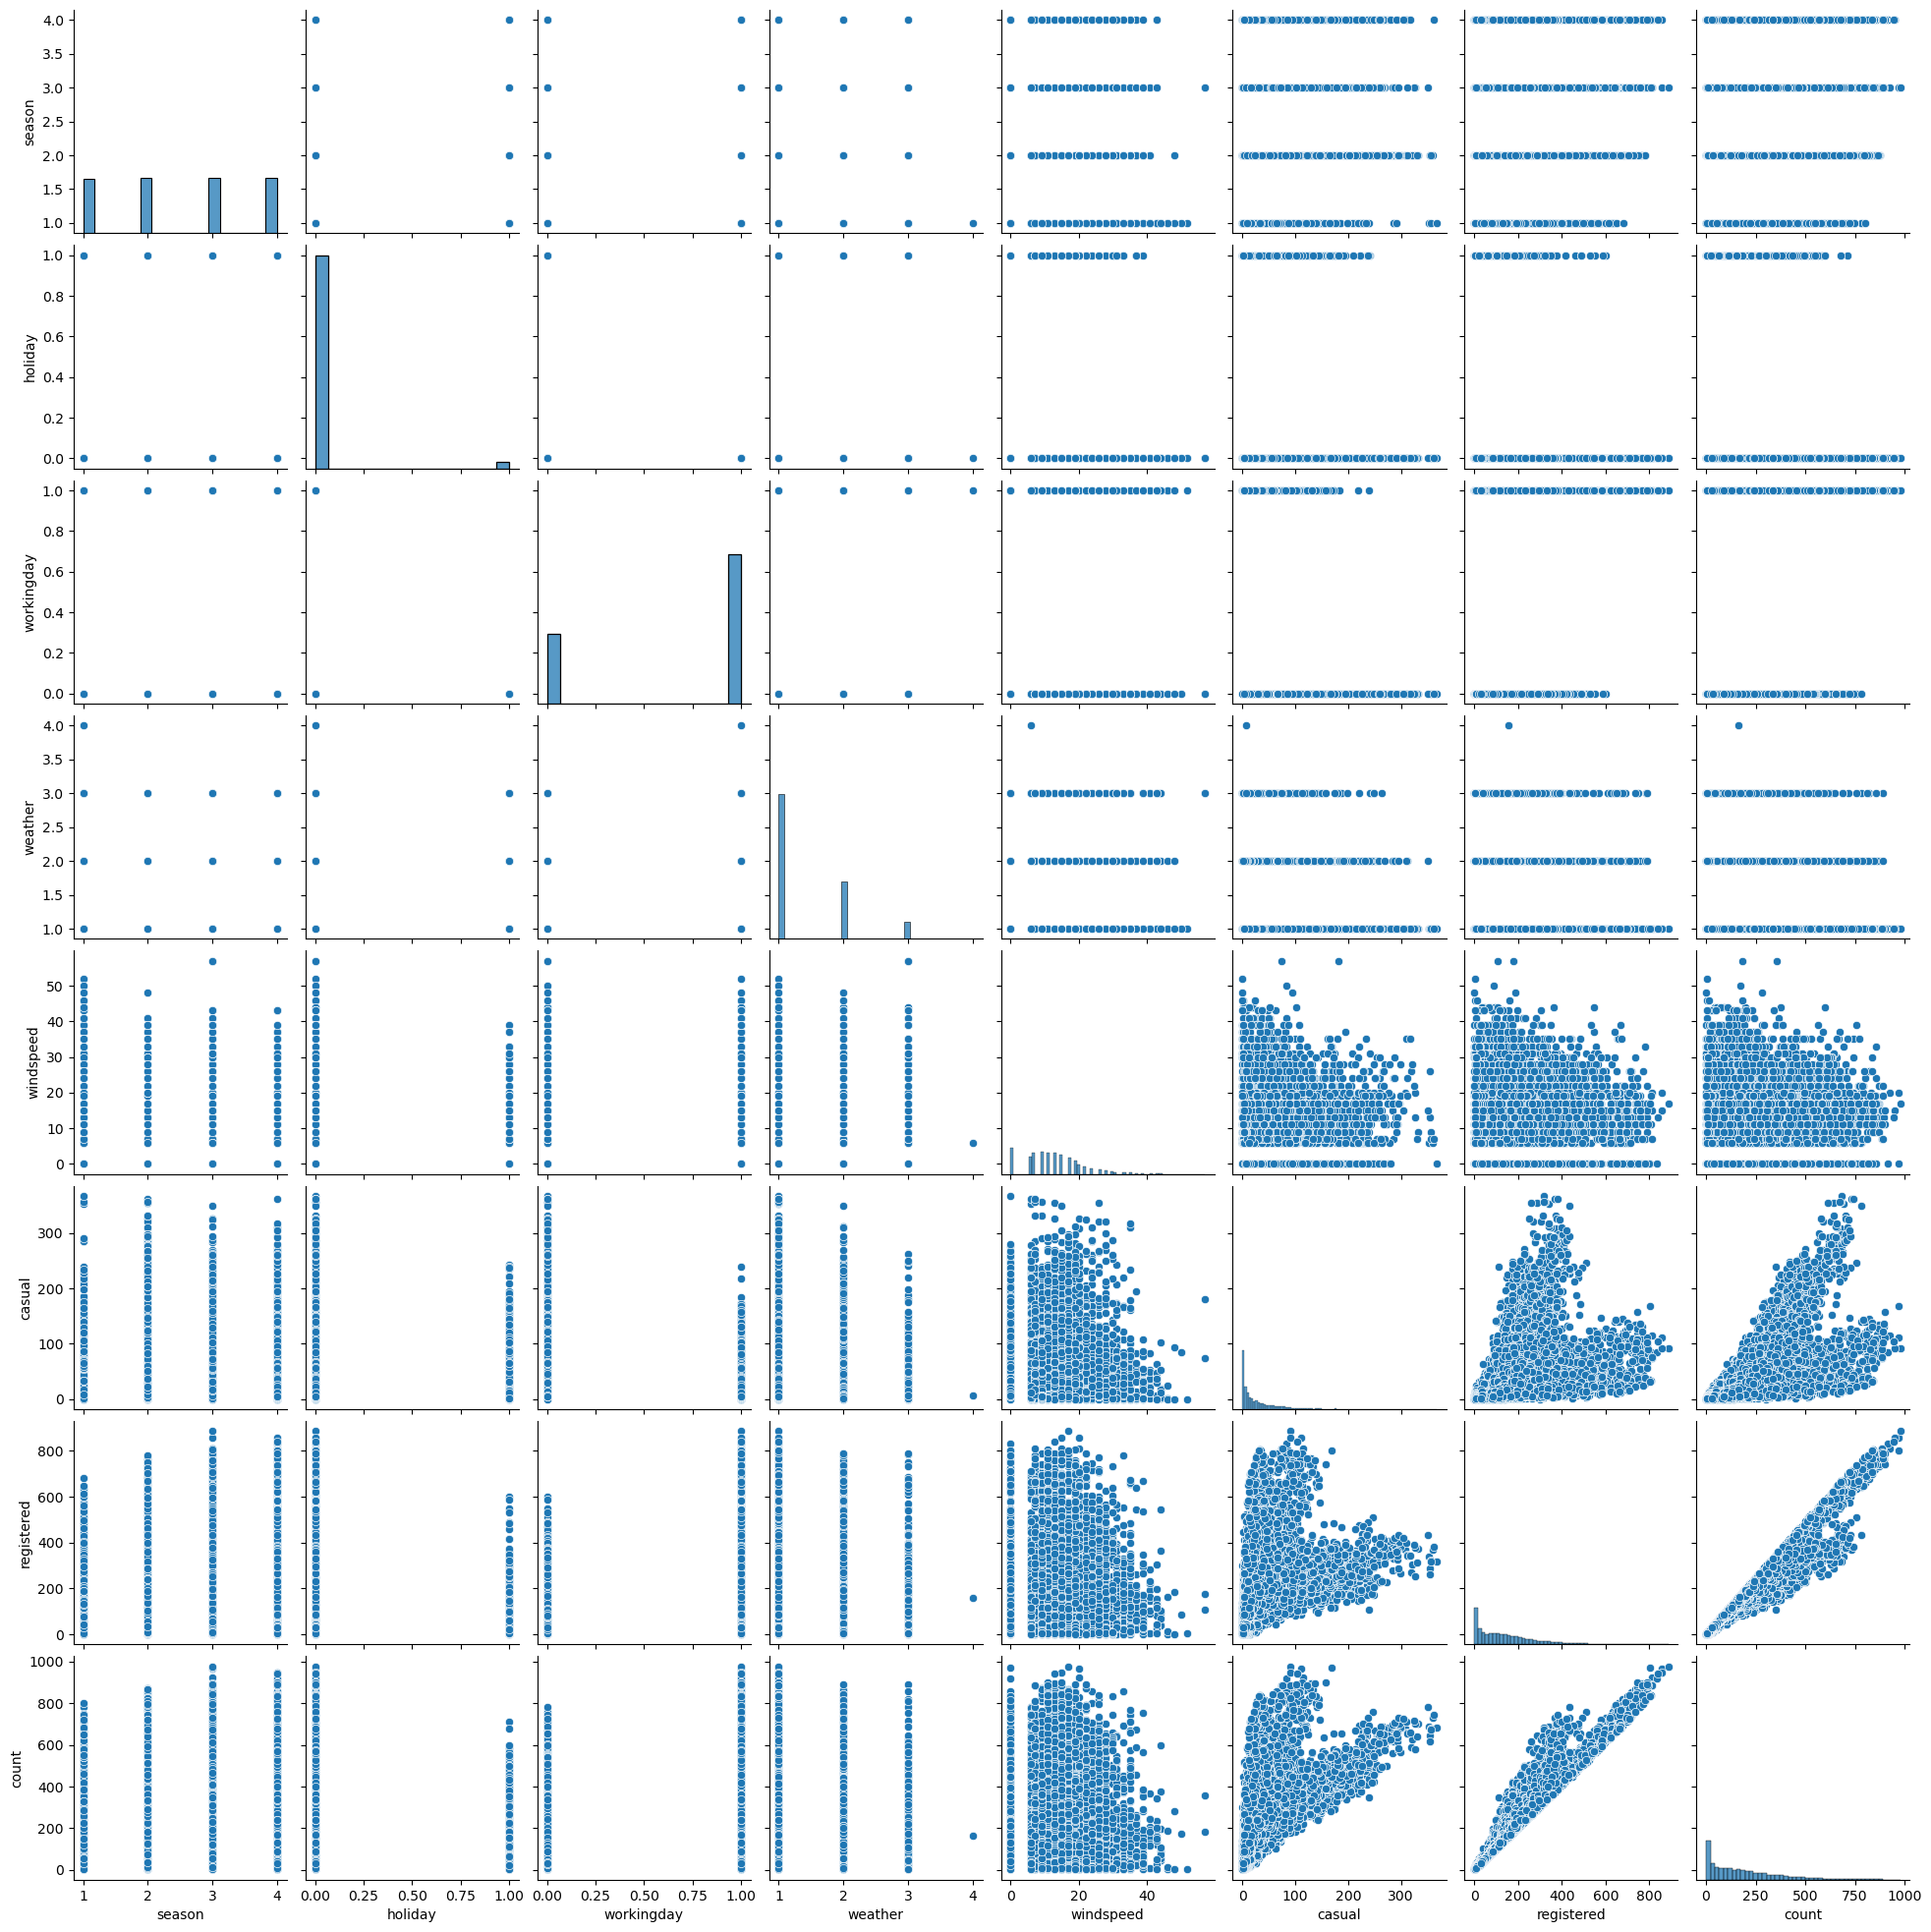

In [101]:
sns.pairplot(data=data)

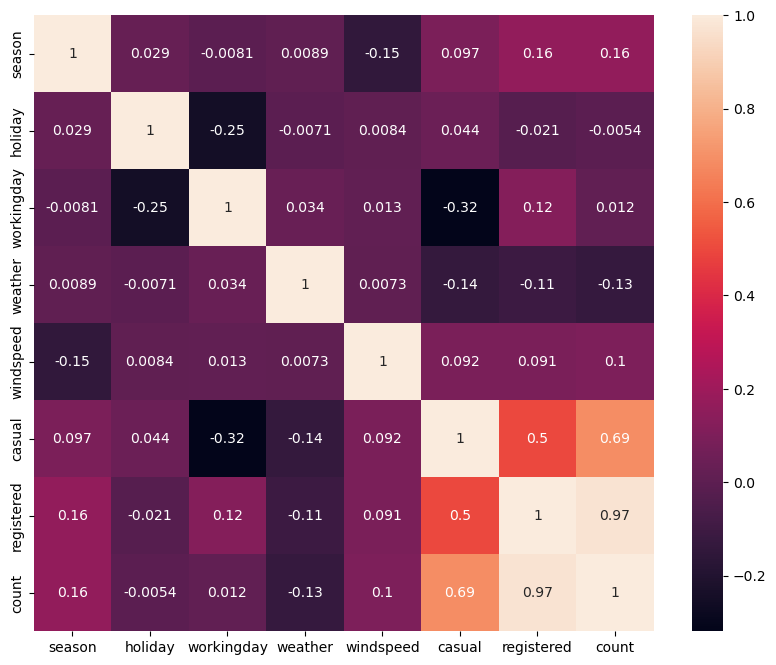

In [102]:
#plotting heat map for correlation
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

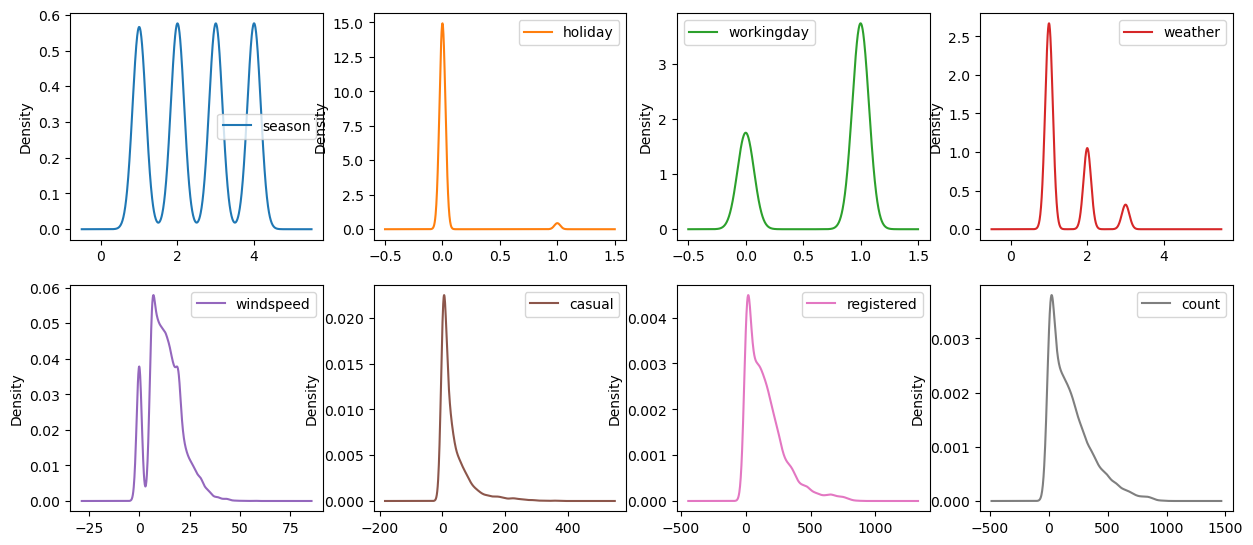

In [105]:
plt.rcParams["figure.figsize"] = [15,10]
data.plot(kind = 'density', subplots = True, layout = (3,4), sharex = False)
plt.show()

In [106]:
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,low,medium,high,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,low,medium,high,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,low,medium,high,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,low,medium,medium_high,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,low,medium,medium_high,0.0,0,1,1


In [107]:
#converting time stamp to date time datatype
data['datetime']=pd.to_datetime(data['datetime'])

In [108]:
data['Date']=data['datetime'].dt.date
data['Time']=data['datetime'].dt.time

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  category      
 6   atemp       10886 non-null  category      
 7   humidity    10864 non-null  category      
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  Date        10886 non-null  object        
 13  Time        10886 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(7), object(2)
memory usage: 968.1+ KB


In [110]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Time
0,2011-01-01 00:00:00,1,0,0,1,low,medium,high,0.0,3,13,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,low,medium,high,0.0,8,32,40,2011-01-01,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,low,medium,high,0.0,5,27,32,2011-01-01,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,low,medium,medium_high,0.0,3,10,13,2011-01-01,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,low,medium,medium_high,0.0,0,1,1,2011-01-01,04:00:00


<AxesSubplot:xlabel='holiday', ylabel='count'>

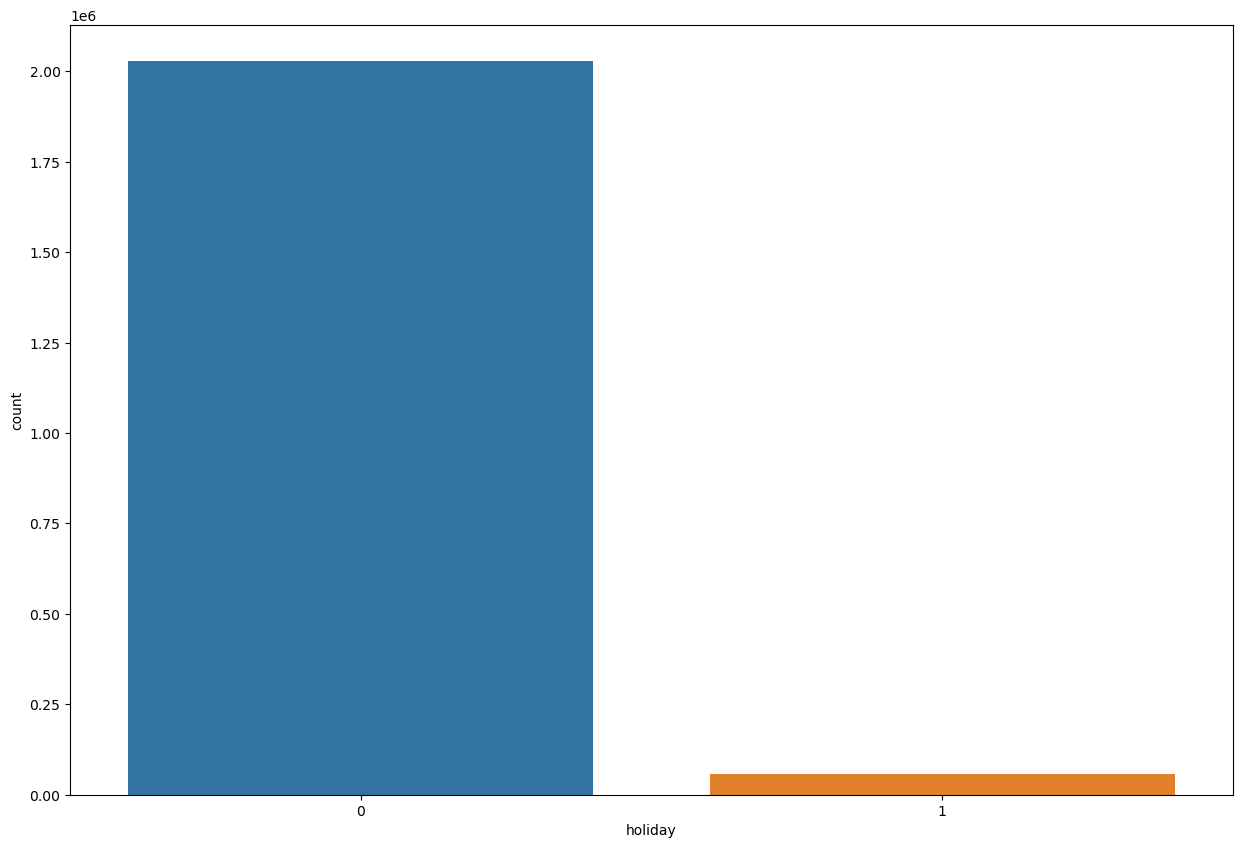

In [111]:
#Total count between holiday and working day
sns.barplot(data=data.groupby('holiday')['count'].sum().reset_index(),x='holiday',y='count')

<AxesSubplot:xlabel='workingday', ylabel='count'>

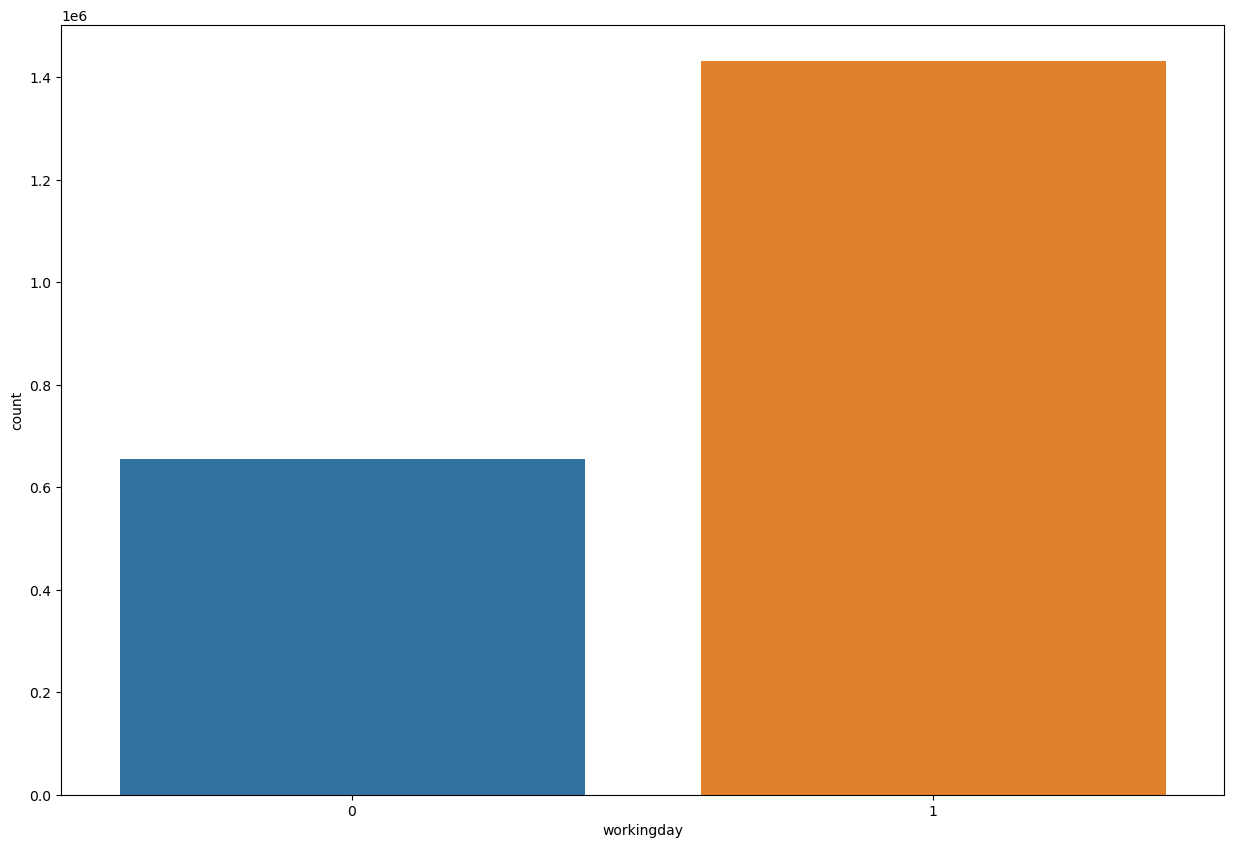

In [112]:
#Total count between holiday and working day
sns.barplot(data=data.groupby('workingday')['count'].sum().reset_index(),x='workingday',y='count')

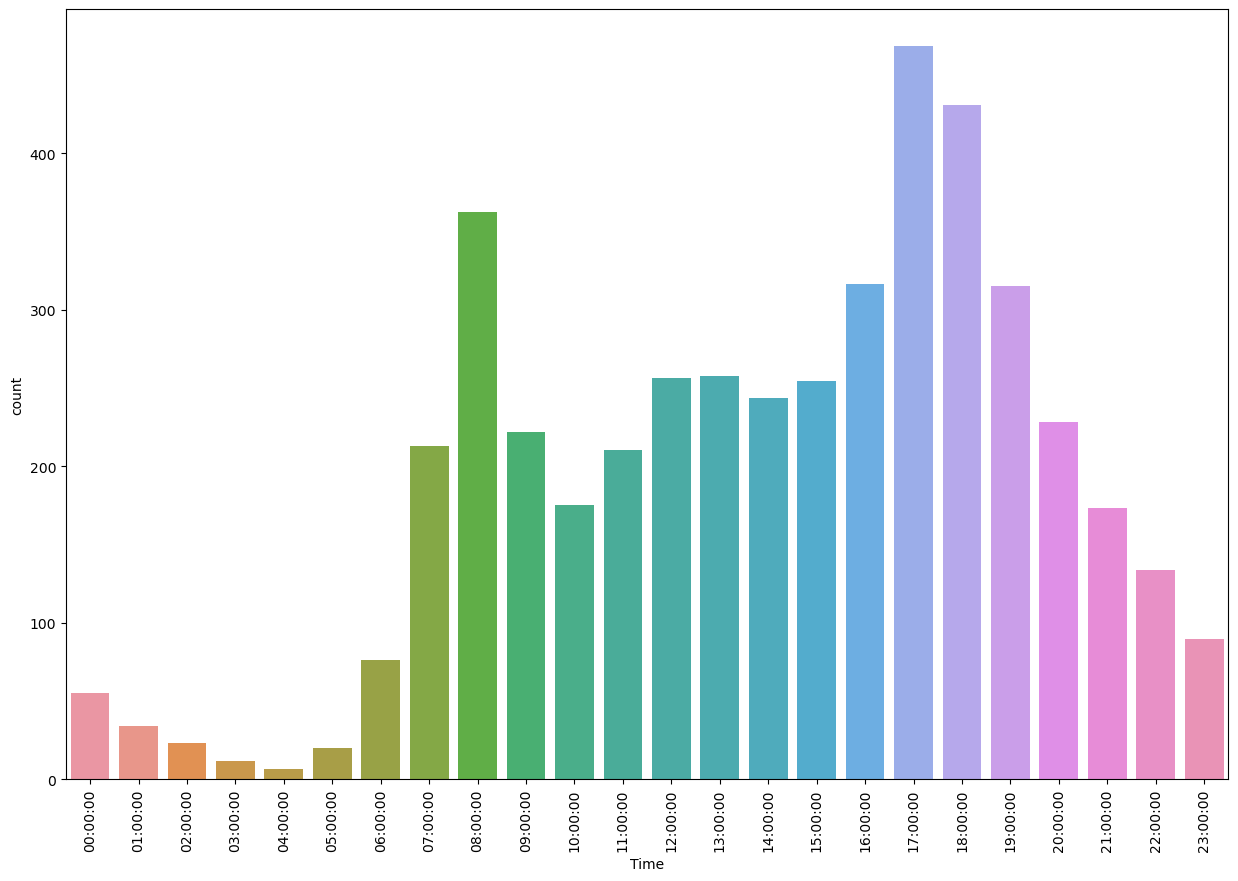

In [113]:
#relation between count and time of day
sns.barplot(data=data.groupby('Time')['count'].mean().reset_index(),x='Time',y='count')
plt.xticks(rotation='90')
plt.show()

In [114]:
#ho:attibutes are not related
#h1:attributes are  realted    

In [115]:
from scipy.stats import ttest_ind,f_oneway,chi2_contingency

In [116]:
data.head(5)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Time
0,2011-01-01 00:00:00,1,0,0,1,low,medium,high,0.0,3,13,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,low,medium,high,0.0,8,32,40,2011-01-01,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,low,medium,high,0.0,5,27,32,2011-01-01,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,low,medium,medium_high,0.0,3,10,13,2011-01-01,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,low,medium,medium_high,0.0,0,1,1,2011-01-01,04:00:00


In [117]:
#relation between season and count
#ho:attibutes are not related
#h1:attributes are  realted 
s1=data[data['season']==1]['count']
s2=data[data['season']==2]['count']
s3=data[data['season']==3]['count']
s4=data[data['season']==4]['count']

stats,pval=f_oneway(s1,s2,s3,s4)
if pval<.05:
    print(f'Reject H0')
else:
    print(f'Failed to reject H0')

Reject H0


In [118]:
#ho:attibutes are independent
#h1:attributes are  not independent
cont_value=pd.crosstab(index=n_data['season'],columns=n_data['count']).values
a,pval,b,c=chi2_contingency(cont_value)
if pval<.05:
    print(f'Reject H0')
else:
    print(f'Failed to reject H0')

Reject H0


<AxesSubplot:xlabel='season', ylabel='count'>

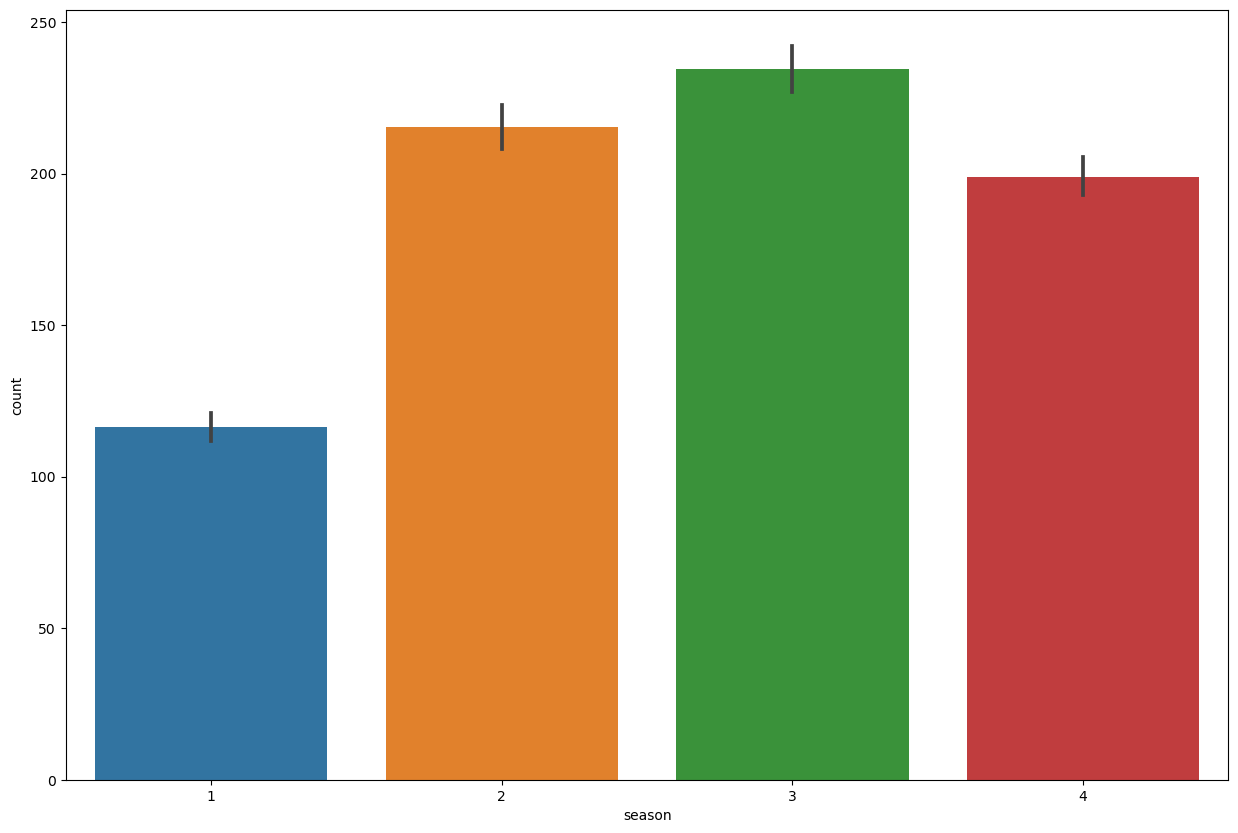

In [119]:
sns.barplot(data=data,x=data['season'],y='count')

In [120]:
#relation between weather and count
#ho:attibutes are not related
#h1:attributes are  realted 
s1=data[data['weather']==1]['count']
s2=data[data['weather']==2]['count']
s3=data[data['weather']==3]['count']
s4=data[data['weather']==4]['count']

stats,pval=f_oneway(s1,s2,s3,s4)
if pval<.05:
    print(f'Reject H0')
else:
    print(f'Failed to reject H0')

Reject H0


In [121]:
#ho:attibutes are independent
#h1:attributes are  not independent
cont_value=pd.crosstab(index=n_data['weather'],columns=n_data['count']).values
a,pval,b,c=chi2_contingency(cont_value)
if pval<.05:
    print(f'Reject H0')
else:
    print(f'Failed to reject H0')

Reject H0


<AxesSubplot:xlabel='weather', ylabel='count'>

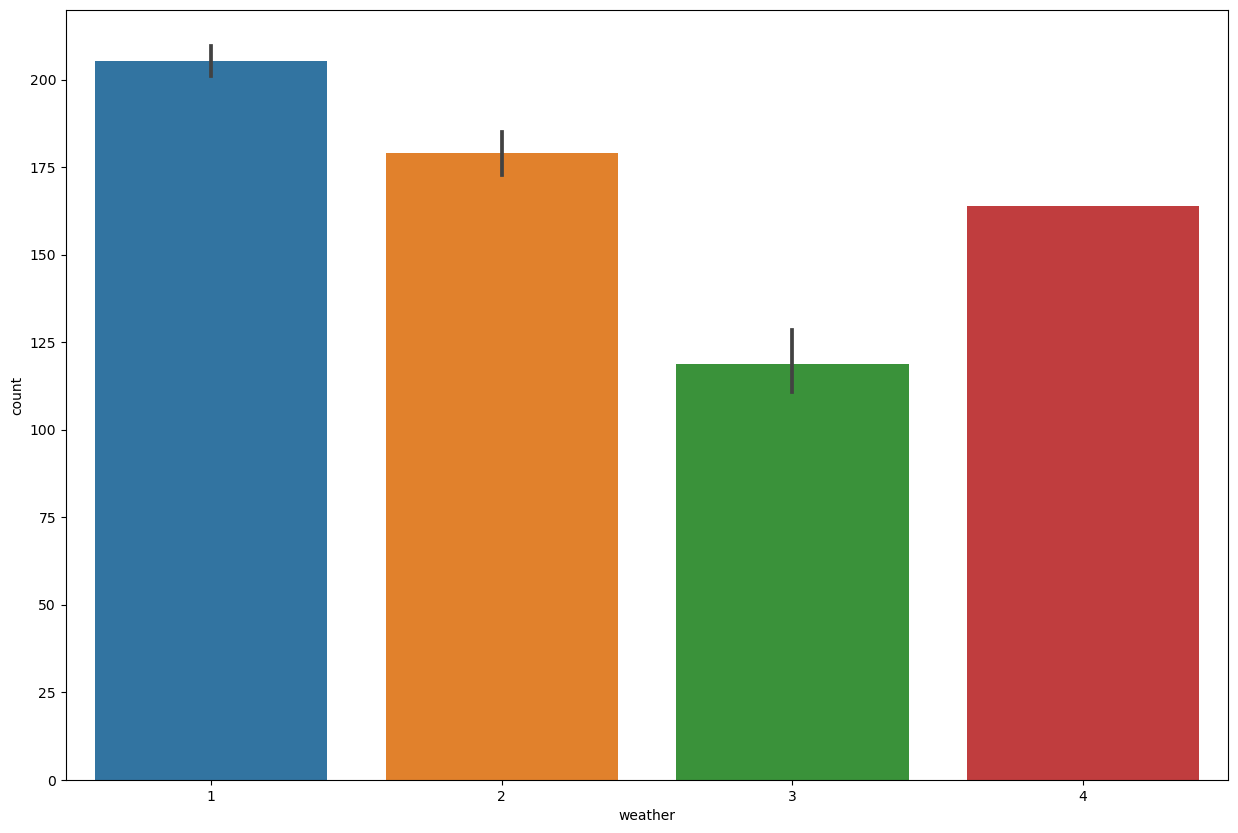

In [122]:
sns.barplot(data=data,x=data['weather'],y='count')

In [123]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Time
0,2011-01-01 00:00:00,1,0,0,1,low,medium,high,0.0,3,13,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,low,medium,high,0.0,8,32,40,2011-01-01,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,low,medium,high,0.0,5,27,32,2011-01-01,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,low,medium,medium_high,0.0,3,10,13,2011-01-01,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,low,medium,medium_high,0.0,0,1,1,2011-01-01,04:00:00


In [124]:
#relation between holiday and count
#ho:attibutes are not related
#h1:attributes are  realted 
s1=data[data['holiday']==1]['count']
s2=data[data['holiday']==0]['count']

stat,pval=ttest_ind(s1,s2)
if pval<.05:
    print(f'Reject H0')
else:
    print(f'Failed to reject H0')


Failed to reject H0


In [125]:
#ho:attibutes are independent
#h1:attributes are  not independent
cont_value=pd.crosstab(index=n_data['holiday'],columns=n_data['count']).values
a,pval,b,c=chi2_contingency(cont_value)
if pval<.05:
    print(f'Reject H0')
else:
    print(f'Failed to reject H0')

Reject H0


<AxesSubplot:xlabel='holiday', ylabel='count'>

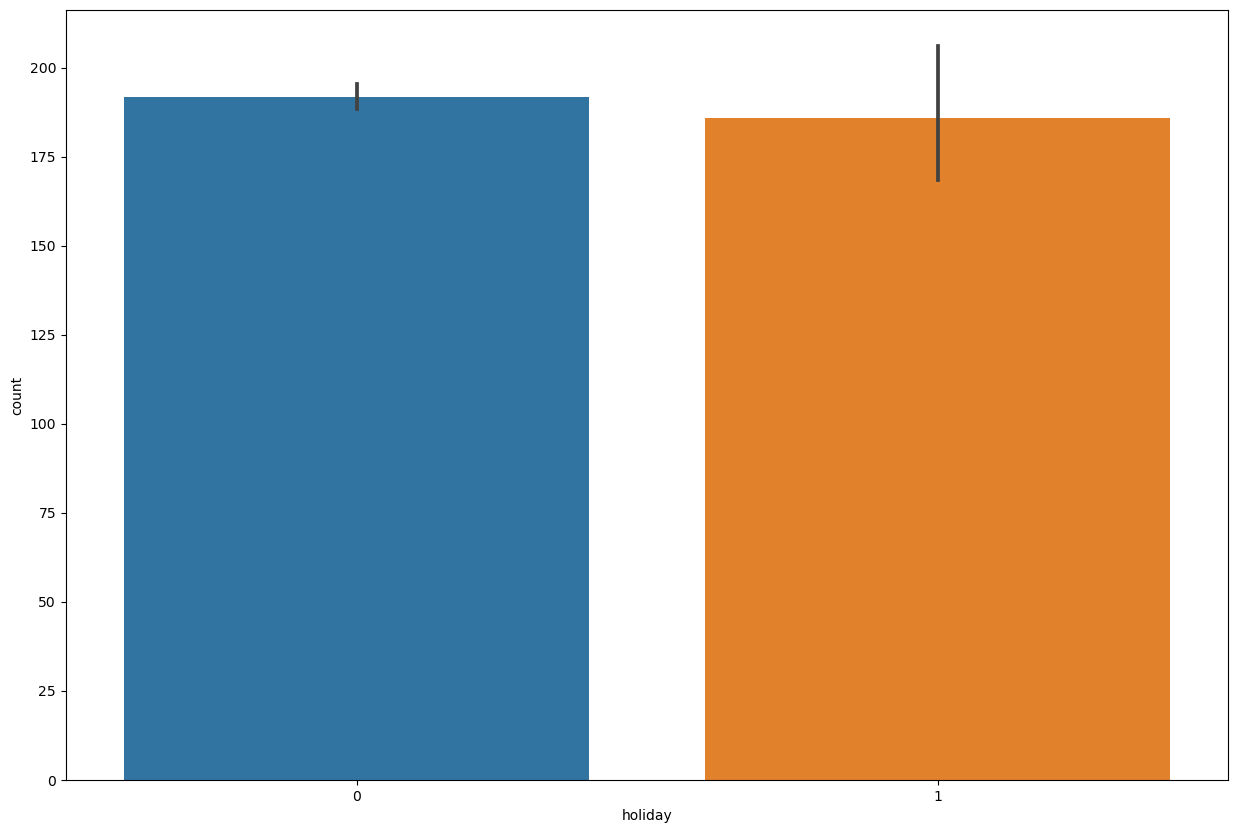

In [126]:
sns.barplot(data=data,x='holiday',y='count')

In [127]:
#relation between workingday and count
#ho:attibutes are not related
#h1:attributes are  realted 

s1=data[data['workingday']==0]['count']
s2=data[data['workingday']==1]['count']

stat,pval=ttest_ind(s1,s2)
if pval<.05:
    print(f'Reject H0')
else:
    print(f'Failed to reject H0')

Failed to reject H0


In [128]:
#ho:attibutes are independent
#h1:attributes are  not independent
cont_value=pd.crosstab(index=n_data['workingday'],columns=n_data['count']).values
a,pval,b,c=chi2_contingency(cont_value)
if pval<.05:
    print(f'Reject H0')
else:
    print(f'Failed to reject H0')

Reject H0


<AxesSubplot:xlabel='workingday', ylabel='count'>

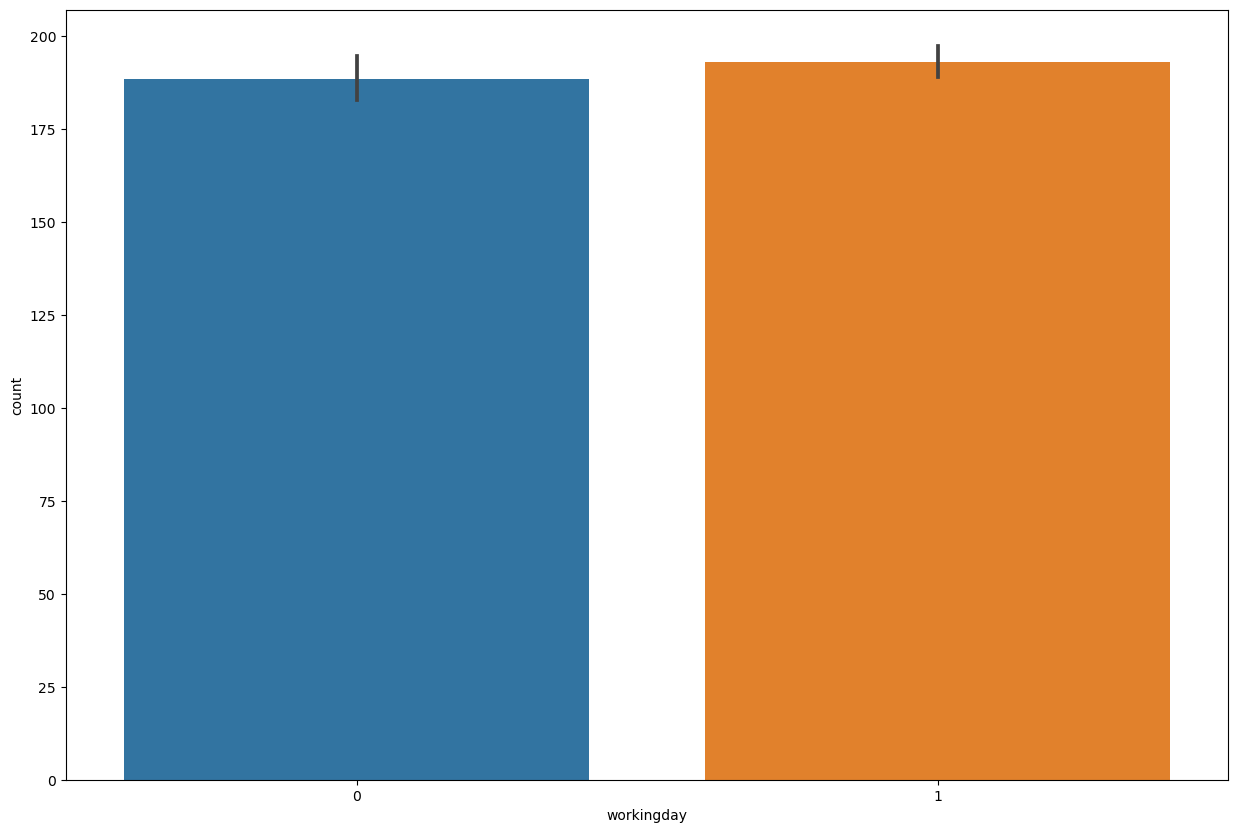

In [129]:
sns.barplot(data=data,x='workingday',y='count')

In [130]:
from scipy.stats import shapiro,levene,kruskal

In [131]:
#relation between temp and count
#ho:attibutes are not related
#h1:attributes are  realted 
s1=data[data['temp']=='low']['count']
s2=data[data['temp']=='medium']['count']
s3=data[data['temp']=='medium_high']['count']
s4=data[data['temp']=='high']['count']

li=[s1,s2,s3,s4]

for _ in li:
    stats,pval=shapiro(_)
    if pval<.05:
        print(f'Is not  Gaussian')
    else:
        print(f'Is Gaussian')
    
 

stats,pval1=levene(s1,s2,s3,s4)
if pval1<.05:
    print(f'Variance not  Equal')
else:
    print(f'Variance  Equal')

    
stats,pval=f_oneway(s1,s2,s3,s4)
if pval<.05:
    print(f'Result of anova :Reject H0')
else:
    print(f'Result of anova : Failed to reject H0')
    
stats,pval=kruskal(s1,s2,s3,s4)
if pval<.05:
    print(f'Result of Krusvalis :Reject H0')
else:
    print(f'Result of Krusvalis : Failed to reject H0')

Is not  Gaussian
Is not  Gaussian
Is not  Gaussian
Is not  Gaussian
Variance not  Equal
Result of anova :Reject H0
Result of Krusvalis :Reject H0


In [132]:
#ho:attibutes are independent
#h1:attributes are  not independent
cont_value=pd.crosstab(index=n_data['temp'],columns=n_data['count']).values
a,pval,b,c=chi2_contingency(cont_value)
if pval<.05:
    print(f'Reject H0')
else:
    print(f'Failed to reject H0')

Reject H0


<AxesSubplot:xlabel='temp', ylabel='count'>

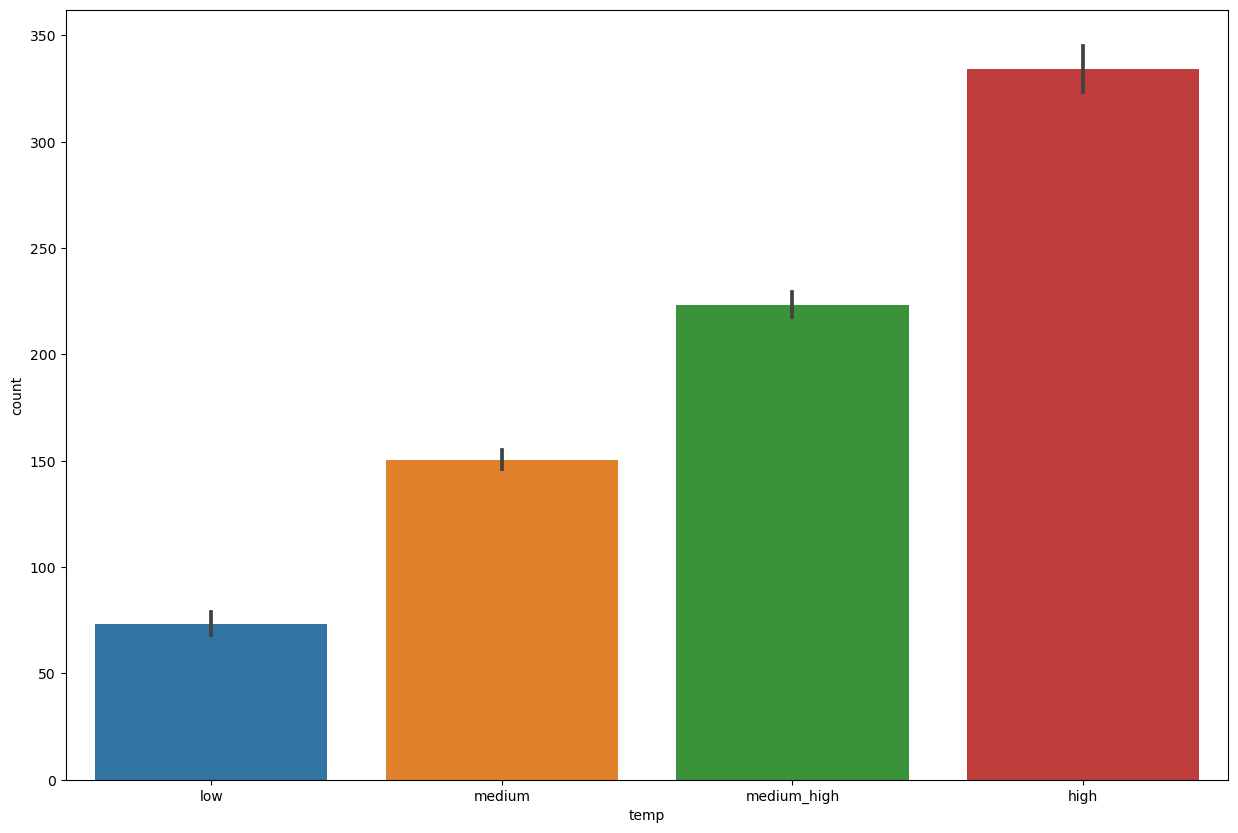

In [133]:
sns.barplot(data=data,x=data['temp'],y='count')

In [134]:
#relation between atemp and count
#ho:attibutes are not related
#h1:attributes are  realted 
s1=data[data['atemp']=='low']['count']
s2=data[data['atemp']=='medium']['count']
s3=data[data['atemp']=='medium_high']['count']
s4=data[data['atemp']=='high']['count']
li=[s1,s2,s3,s4]

for _ in li:
    stats,pval=shapiro(_)
    if pval<.05:
        print(f'Is not  Gaussian')
    else:
        print(f'Is Gaussian')
    
 

stats,pval1=levene(s1,s2,s3,s4)
if pval1<.05:
    print(f'Variance not  Equal')
else:
    print(f'Variance  Equal')

    
stats,pval=f_oneway(s1,s2,s3,s4)
if pval<.05:
    print(f'Result of anova :Reject H0')
else:
    print(f'Result of anova : Failed to reject H0')
    
stats,pval=kruskal(s1,s2,s3,s4)
if pval<.05:
    print(f'Result of Krusvalis :Reject H0')
else:
    print(f'Result of Krusvalis : Failed to reject H0')

Is not  Gaussian
Is not  Gaussian
Is not  Gaussian
Is not  Gaussian
Variance not  Equal
Result of anova :Reject H0
Result of Krusvalis :Reject H0


In [135]:
#ho:attibutes are independent
#h1:attributes are  not independent
cont_value=pd.crosstab(index=n_data['atemp'],columns=n_data['count']).values
a,pval,b,c=chi2_contingency(cont_value)
if pval<.05:
    print(f'Reject H0')
else:
    print(f'Failed to reject H0')

Reject H0


<AxesSubplot:xlabel='atemp', ylabel='count'>

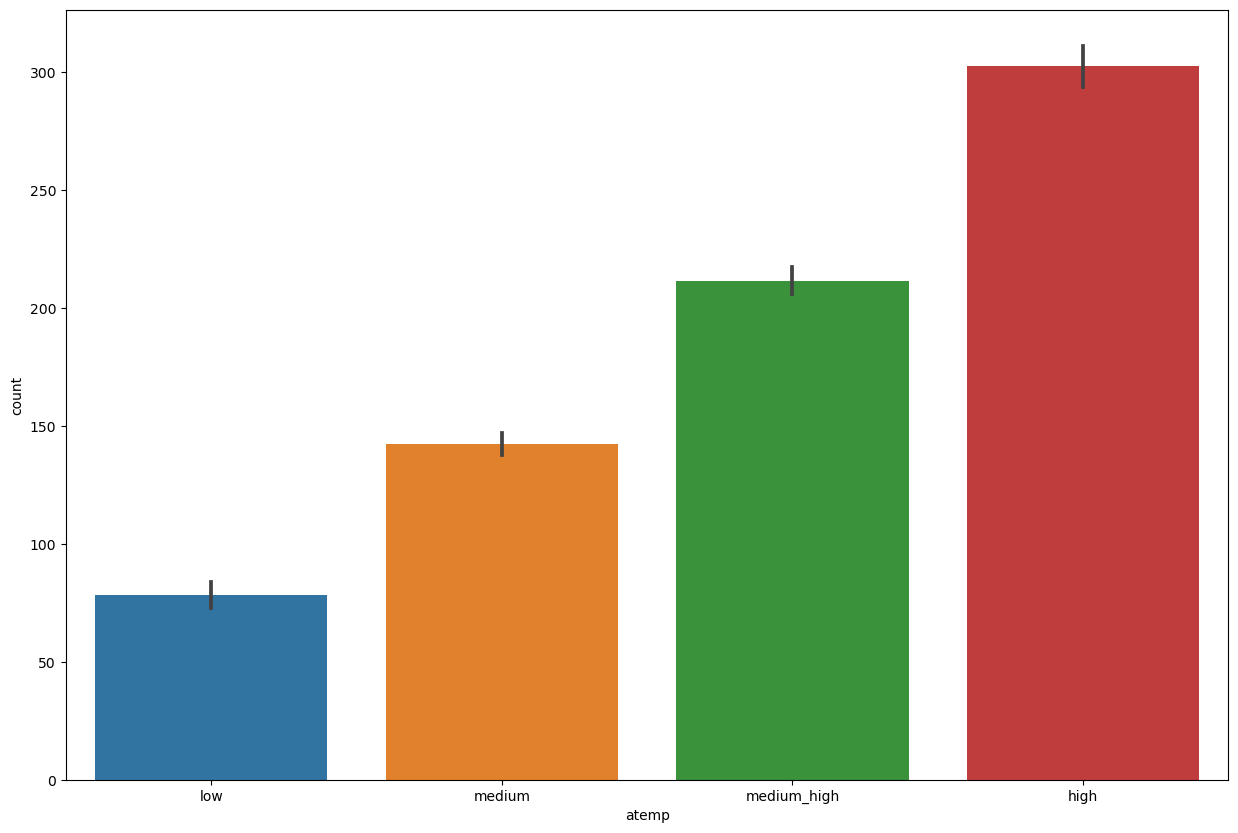

In [136]:
sns.barplot(data=data,x=data['atemp'],y='count')

In [137]:
#relation between humidity and count
#ho:attibutes are not related
#h1:attributes are  realted 
s1=data[data['humidity']=='low']['count']
s2=data[data['humidity']=='medium']['count']
s3=data[data['humidity']=='medium_high']['count']
s4=data[data['humidity']=='high']['count']

li=[s1,s2,s3,s4]

for _ in li:
    stats,pval=shapiro(_)
    if pval<.05:
        print(f'Is not  Gaussian')
    else:
        print(f'Is Gaussian')
    
 

stats,pval1=levene(s1,s2,s3,s4)
if pval1<.05:
    print(f'Variance not  Equal')
else:
    print(f'Variance  Equal')

    
stats,pval=f_oneway(s1,s2,s3,s4)
if pval<.05:
    print(f'Result of anova :Reject H0')
else:
    print(f'Result of anova : Failed to reject H0')
    
stats,pval=kruskal(s1,s2,s3,s4)
if pval<.05:
    print(f'Result of Krusvalis :Reject H0')
else:
    print(f'Result of Krusvalis : Failed to reject H0')

Is not  Gaussian
Is not  Gaussian
Is not  Gaussian
Is not  Gaussian
Variance not  Equal
Result of anova :Reject H0
Result of Krusvalis :Reject H0


In [138]:
#ho:attibutes are independent
#h1:attributes are  not independent
cont_value=pd.crosstab(index=n_data['humidity'],columns=n_data['count']).values
a,pval,b,c=chi2_contingency(cont_value)
if pval<.05:
    print(f'Reject H0')
else:
    print(f'Failed to reject H0')

Reject H0


<AxesSubplot:xlabel='humidity', ylabel='count'>

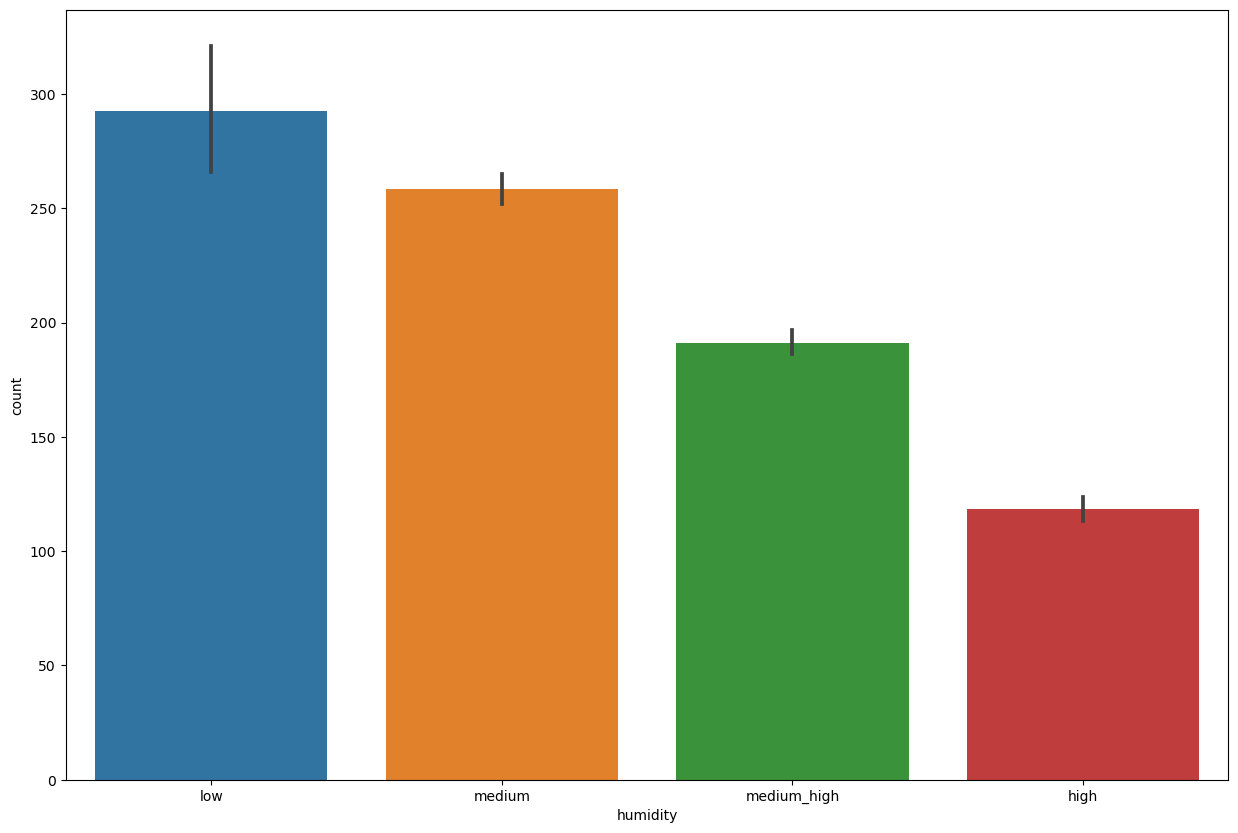

In [139]:
sns.barplot(data=data,x=data['humidity'],y='count')

In [140]:
#Are weatehr and season related?
#ho:attibutes are independent
#h1:attributes are  not independent
cont_value=pd.crosstab(index=n_data['weather'],columns=n_data['season']).values
a,pval,b,c=chi2_contingency(cont_value)
if pval<.05:
    print(f'Reject H0')
else:
    print(f'Failed to reject H0')

Reject H0
